<div style="display: flex; align-items: center;"> 
    <img src="static/imgdb.png" alt="Descrizione dell'immagine" width="120" height="120">
    <h1> API IGDB </h1>
</div>

IGDB è un database contenente miliardi di video games con descrizioni immagini valutazioni e tutto ciò che riguarda i video games

è possibile fare richieste tramite le API messe a disposizione di IGDB tramite i vari endpoint la documentazione è presente in questo sito https://api-docs.igdb.com/#getting-started

prima di utilizzare tali api bisognerà registrare un account su twitch, e successivamente creare la tua applicazione così da ottenere un client ID e la chiave API

<img src="static/twitch.png" alt="Descrizione dell'immagine" width="500" height="500">

dopo aver creato la tua applicazione, avrai ottenuto in id e il segreto token

<img src="static/token_key.jpeg" alt="Descrizione dell'immagine" width="500" height="400">

ora tramite la libreria request dovremmo ottenere l'access token con cui potremmo iniziare a fare richieste tramite gli endpoint

In [1]:
import requests

client_id = "flw9cfp5esos3yv3jf0zhcgjzdktsn"
client_secret = "n28sldh366fgtuiybpb3ehst3i70wq"

def get_access_token(client_id, client_secret):
    # Define the parameters for the POST request

    url='https://id.twitch.tv/oauth2/token'
    params = {
        "client_id": client_id,
        "client_secret": client_secret,
        "grant_type": "client_credentials"
    }
        # Make the POST request
    response = requests.post(url, params=params)

        # Check if the request was successful (status code 200)
    if response.status_code == 200:
            # Return the access token from the JSON response
        return response.json().get("access_token")


potremmo salvare il contenuto del file json o prendere ciò che ci interessa ovvero l'access token tramite una funzione appropiata un esempio sopra ^

un esempio di richiesta che possiamo fare tramite queste api è la ricerca di statistiche e descrizione sul gioco tramite l'endpoint "games"

In [2]:
import requests
# Definisci l'endpoint di ricerca
search_url = 'https://api.igdb.com/v4/games'

access_token=get_access_token(client_id, client_secret)

# Imposta gli header con le credenziali
headers = {
    'Client-ID': client_id,
    'Authorization': f'Bearer {access_token}'
}


game_name = input("inserisci un nome di un gioco: ")
search_criteria = f'fields id,name,summary,rating,platforms, genres.name, videos; where name="{game_name}";'

search_response = requests.post(search_url, headers=headers, data=search_criteria)

if search_response.status_code == 200 and len(search_response.json()) > 0:
    # Estrai i dettagli del primo gioco dalla risposta
    game_details = search_response.json()[0]

    # Stampa i dettagli del gioco
    print("Dettagli del gioco:")
    print(f"Nome: {game_details['name']}")
    print(f"Descrizione: {game_details['summary']}")
    print(f"Valutazione: {game_details['rating']}")
    platforms = [str(platform) for platform in game_details['platforms']]
    print(f"Piattaforme: {', '.join(platforms)}")
    print(f"genere: {game_details['genres']}")
else:
    print(f"Nessun gioco trovato con il nome: {game_name}")


un esempio di utilizzo avanzato di tali api è creare una lista di giochi da cui prelavare i vari dati disponibili su IGDB così da salvare il contenuto in un file json e creare tramite esso un dataframe

import requests
import pandas as pd
import json

search_url = 'https://api.igdb.com/v4/games'

headers = {
    'Client-ID': client_id,
    'Authorization': f'Bearer {access_token}'
}

# lista giochi da cercare
game_names = ['Halo 4', 'Halo 3', 'The Witcher 3: Wild Hunt - Complete Edition', 'Halo 2', 'Dark Souls', 'The Legend of Zelda', 'Minecraft', 'Bloodborne: Game of the Year Edition', "Assassin's Creed", 'Call of Duty','Grand Theft Auto V: Special Edition']

# Crea una lista vuota per i dati dei giochi
game_data = []

# Effettua la ricerca per ciascun gioco
for game_name in game_names:
    search_criteria = f'fields id,name,summary,total_rating,platforms; where name="{game_name}"; sort total_rating desc; limit 1;'
    search_response = requests.post(search_url, headers=headers, data=search_criteria)
    
    if search_response.status_code == 200 and len(search_response.json()) > 0:
        game_details = search_response.json()[0]
        game_data.append(game_details)

# Salva i dati dei giochi in un file JSON
with open('game_data.json', 'w') as json_file:
    json.dump(game_data, json_file)

print("Dati dei giochi salvati in game_data.json")


una volta salvato il file json sarà possibile usare la libreria pandas per creare il nostro dataframe

In [3]:
import pandas as pd

# Carica i dati da file JSON in un DataFrame
df = pd.read_json('static/game_data.json')

# Ora puoi lavorare con il DataFrame
df


,id,name,platforms,summary,total_rating
0,991,Halo 4,"[6, 12, 49]",Halo 4 marks the start of an epic new saga wit...,83.085201
1,987,Halo 3,"[6, 12, 49]",Halo 3 is a shooter game where players primari...,88.143951
2,119402,The Witcher 3: Wild Hunt - Complete Edition,"[6, 48, 49, 130, 167, 169]","The Witcher 3: Wild Hunt is a story-driven, op...",93.278229
3,986,Halo 2,"[6, 11, 49]",Halo 2 is the sequel to the highly successful ...,82.510530
4,2155,Dark Souls,"[6, 9, 12]",An action RPG and spiritual sequel to Demon's ...,89.001610
5,1022,The Legend of Zelda,"[5, 18, 37, 41, 51, 99]",The Legend of Zelda is the first title in the ...,81.221375
6,121,Minecraft,"[3, 6, 14]",Minecraft focuses on allowing the player to ex...,84.287304
7,42931,Bloodborne: Game of the Year Edition,[48],"With new story details, learn the tale of hunt...",97.102319
8,128,Assassin's Creed,"[6, 9, 12]",Assassin's Creed is a non-linear action-advent...,77.093424
9,621,Call of Duty,"[6, 9, 12, 14, 42]","The player has two primary weapon slots, a han...",84.289366


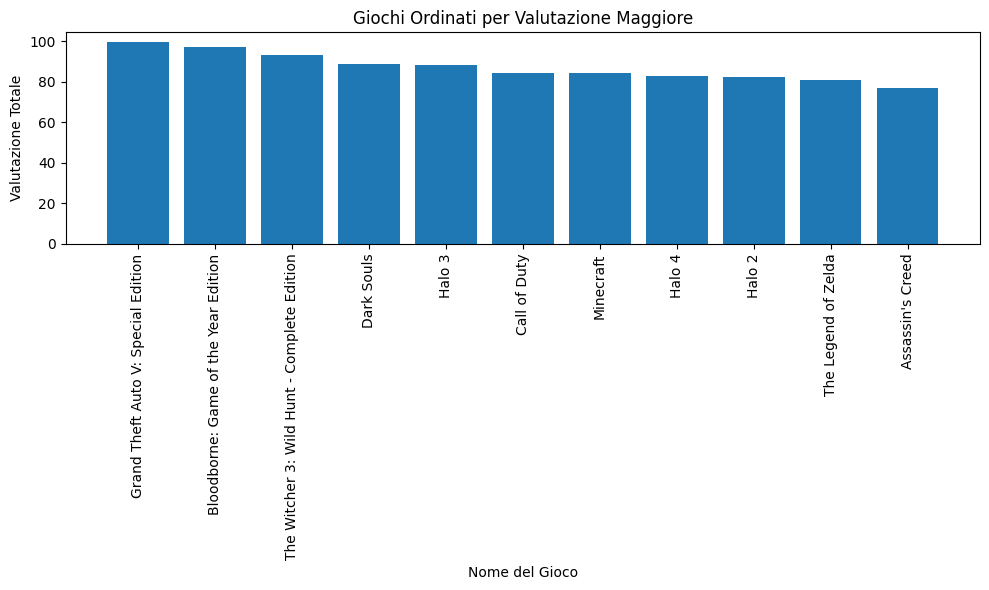

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
# Ordina il DataFrame per la colonna "total_rating" in ordine decrescente
df = df.sort_values(by='total_rating', ascending=False)

# Crea il grafico
plt.figure(figsize=(10, 6))
plt.bar(df['name'], df['total_rating'])
plt.xlabel('Nome del Gioco')
plt.ylabel('Valutazione Totale')
plt.title('Giochi Ordinati per Valutazione Maggiore')
plt.xticks(rotation=90)  # Ruota le etichette sull'asse x per una migliore leggibilità

# Mostra il grafico
plt.tight_layout()
plt.show()


potremmo usare queste statistiche per esempio per ricavarne un grafico così da individuare quali sono i giochi più valutati negli ultimi anni

si possono fare anche richieste per farti ritornarnare il genere dei giochi


import requests

search_url = 'https://api.igdb.com/v4/games'

headers = {
    'Client-ID': client_id,
    'Authorization': f'Bearer {access_token}'
}

game_name = input("Inserisci il nome di un gioco: ")
search_criteria = f'fields id,name,genres.name; where name="{game_name}";'

search_response = requests.post(search_url, headers=headers, data=search_criteria)

if search_response.status_code == 200 and len(search_response.json()) > 0:
    # Estrai i dettagli del primo gioco dalla risposta
    game_details = search_response.json()[0]

    # Verifica se il gioco ha informazioni sul genere
    if 'genres' in game_details:
        genres = [genre['name'] for genre in game_details['genres']]
        print(f"Genere/i: {', '.join(genres)}")
    else:
        print(f"Nessuna informazione sul genere per il gioco: {game_name}")
else:
    print(f"Nessun gioco trovato con il nome: {game_name}")



in questo caso inseriamo 5 giochi da tastiera e ci ritornerà informazioni sulla valutazione rating dovremmo inserire genres.name per ottenere il nome del genere perchè 

import json
import requests

headers = {
    'Client-ID': client_id,
    'Authorization': f'Bearer {access_token}'
}

games_by_genre = {}

for _ in range(5):
    # Definisci i criteri di ricerca (titolo del gioco)
    game_name = input("Inserisci il nome di un gioco: ")
    search_criteria = f'fields id,name,genres.name,rating; where name="{game_name}";'

    # Effettua la richiesta di ricerca
    search_response = requests.post(search_url, headers=headers, data=search_criteria)

    # Verifica se sono stati trovati giochi
    if search_response.status_code == 200 and len(search_response.json()) > 0:
        # Estrai i dettagli del primo gioco dalla risposta
        game_details = search_response.json()[0]

        # Verifica se il gioco ha informazioni sul genere
        if 'genres' in game_details:
            genres = [genre['name'] for genre in game_details['genres']]
            print(f"Genere/i: {', '.join(genres)}")
        else:
            print(f"Nessuna informazione sul genere per il gioco: {game_name}")

        # Verifica se il gioco ha informazioni sulla valutazione
        if 'rating' in game_details:
            rating = game_details['rating']
            print(f"Valutazione: {rating}")
        else:
            print(f"Nessuna informazione sulla valutazione per il gioco: {game_name}")

        # Aggiungi i dettagli del gioco al dizionario raggruppato per genere
        for genre in genres:
            if genre not in games_by_genre:
                games_by_genre[genre] = []
            games_by_genre[genre].append(game_details)
    else:
        print(f"Nessun gioco trovato con il nome: {game_name}")

output_filename = "games_by_genre.json"
with open(output_filename, 'w') as json_file:
    json.dump(games_by_genre, json_file, indent=2)

print(f"I dettagli dei giochi sono stati salvati raggruppati per genere in '{output_filename}'")


In [5]:
import pandas as pd
import json


with open("static/games_by_genre.json", "r") as json_file:
    games_by_genre = json.load(json_file)


data = {'Genre': [], 'Games': []}

for genre, games_list in games_by_genre.items():
    data['Genre'].append(genre)
    data['Games'].append(games_list)

df = pd.DataFrame(data)


df


,Genre,Games
0,Role-playing (RPG),"[{'id': 92550, 'genres': [{'id': 12, 'name': '..."
1,Shooter,"[{'id': 77290, 'genres': [{'id': 5, 'name': 'S..."
2,Racing,"[{'id': 45131, 'genres': [{'id': 5, 'name': 'S..."
3,Sport,"[{'id': 45131, 'genres': [{'id': 5, 'name': 'S..."
4,Platform,"[{'id': 128, 'genres': [{'id': 8, 'name': 'Pla..."
5,Adventure,"[{'id': 128, 'genres': [{'id': 8, 'name': 'Pla..."


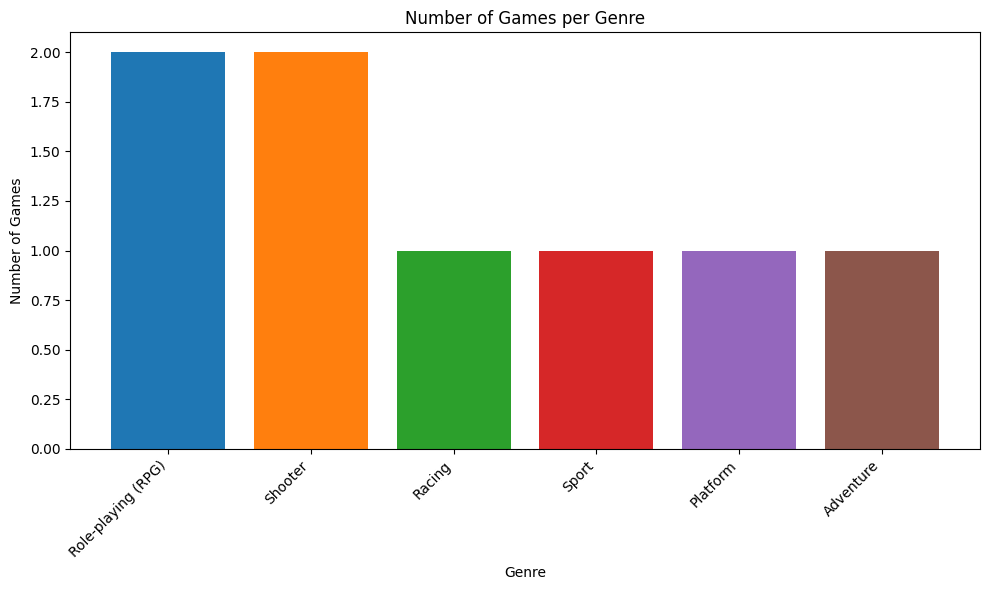

In [6]:
plt.figure(figsize=(10, 6))
for index, row in df.iterrows():
    plt.bar(row['Genre'], len(row['Games']))

plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.title('Number of Games per Genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostra il grafico
plt.show()

ora tramite un file in cui inserirò i giochi creerò un dataframe contenente i giochi con genere e valutazione e anno di uscità

import json
import requests
from datetime import datetime

headers = {
    'Client-ID': client_id,
    'Authorization': f'Bearer {access_token}'
}

games_details_list = []

with open("/home/simone/Scrivania/nomi_giochi.txt", "r") as file:
    game_names = [line.strip() for line in file]

for game_name in game_names:
    search_criteria = f'fields id,name,genres.name,rating,release_dates.date; where name="{game_name}";'

    # Effettua la richiesta di ricerca
    search_response = requests.post(search_url, headers=headers, data=search_criteria)

    # Verifica se sono stati trovati giochi
    if search_response.status_code == 200 and len(search_response.json()) > 0:
        # Estrai i dettagli del primo gioco dalla risposta
        game_details = search_response.json()[0]

        # Verifica se il gioco ha informazioni sul genere
        if 'genres' in game_details:
            genres = [genre['name'] for genre in game_details['genres']]
        else:
            genres= ['N/A']

        # Verifica se il gioco ha informazioni sulla valutazione
        if 'rating' in game_details:
            rating = game_details['rating']
        else:
            rating = 0

        # Verifica se il gioco ha informazioni sull'anno di uscita
        release_dates = game_details.get('release_dates', [])
        if release_dates:
            timestamp_str = release_dates[0].get('date', 'N/A')
            try:
                timestamp = int(timestamp_str)
                release_date = datetime.utcfromtimestamp(timestamp).strftime('%d-%m-%Y')
            except ValueError:
                print(f"Errore nella conversione del timestamp per il gioco: {game_name}")
                release_date = 'N/A'
        else:
            print(f"Nessuna informazione sull'anno di uscita per il gioco: {game_name}")
            release_date = 'N/A'

        # Aggiungi i dettagli del gioco alla lista
        games_details_list.append(game_details)
    else:
        print(f"Nessun gioco trovato con il nome: {game_name}")

output_filename = "games_details.json"
with open(output_filename, 'w') as json_file:
    json.dump(games_details_list, json_file, indent=2)

print(f"I dettagli dei giochi sono stati salvati in '{output_filename}'")


import pandas as pd
import json

with open("static/ListaGames.json", "r") as json_file:
    games_details_list = json.load(json_file)

# Lista per memorizzare i dati dei giochi
data = {'Name': [], 'Genres': [], 'Rating': [], 'ReleaseDate': []}

for game_details in games_details_list:
    
    name = game_details.get('name', 'N/A')
    
    # Verifica se il gioco ha informazioni sul genere
    if 'genres' in game_details:
        genres = [genre['name'] for genre in game_details['genres']]
    else:
        genres = ['N/A']
    
    # Verifica se il gioco ha informazioni sulla valutazione
    rating = game_details.get('rating', 'N/A')
    
    # Verifica se il gioco ha informazioni sull'anno di uscita
    release_dates = game_details.get('release_dates', [])
    if release_dates:
        timestamp = release_dates[0].get('date', None)
        release_date = pd.to_datetime(timestamp, unit='s').strftime('%d-%m-%Y') if timestamp else 'N/A'
    else:
        release_date = 'N/A'

    # Aggiungi i dettagli del gioco alla lista
    data['Name'].append(name)
    data['Genres'].append(', '.join(genres))
    data['Rating'].append(rating)
    data['ReleaseDate'].append(release_date)


df = pd.DataFrame(data)

df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df

tramite questi dati andrò a creare un boxplot sulla valutazione dei giochi

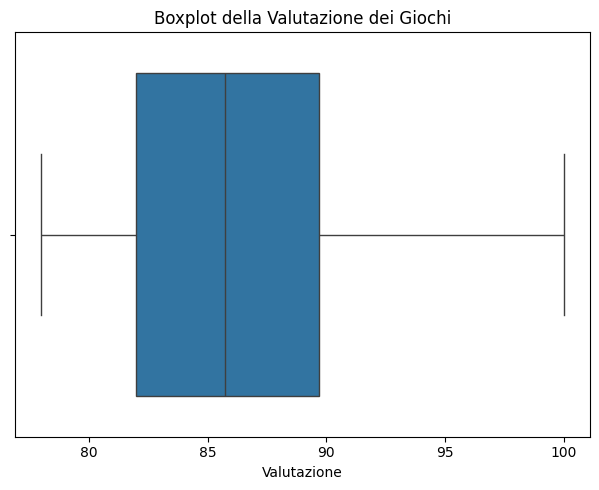

In [8]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns 

# Rimuovi le righe con genere mancante ('N/A')
df = df[df['Genres'] != 'N/A']


df_genres = df['Genres'].str.split(', ', expand=True)

# Unisci il DataFrame principale con i generi espansi
df = pd.concat([df, df_genres], axis=1)

# Converte la colonna 'Rating' in formato numerico
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Creazione di un boxplot unico per tutte le valutazioni
plt.figure(figsize=(12, 5))

plt.subplot(121)
sns.boxplot(x='Rating', y=None, data=df)  # Specifica 'y=None'
plt.xlabel('Valutazione')
plt.title('Boxplot della Valutazione dei Giochi')
plt.tight_layout()


Il boxplot è utile per identificare la centralità, la dispersione e la presenza di valori anomali nella distribuzione delle valutazioni dei giochi. Ad esempio, puoi vedere la mediana (linea nella scatola) e ottenere un'idea della dispersione dei dati e della presenza di valutazioni estreme.

Se la distribuzione è simmetrica e la scatola è centrata, significa che la maggior parte delle valutazioni si concentra intorno alla mediana. Se ci sono molti outliers, potrebbe esserci una variazione significativa nelle valutazioni, e potrebbe essere utile esaminare più dettagliatamente le ragioni di queste valutazioni estreme

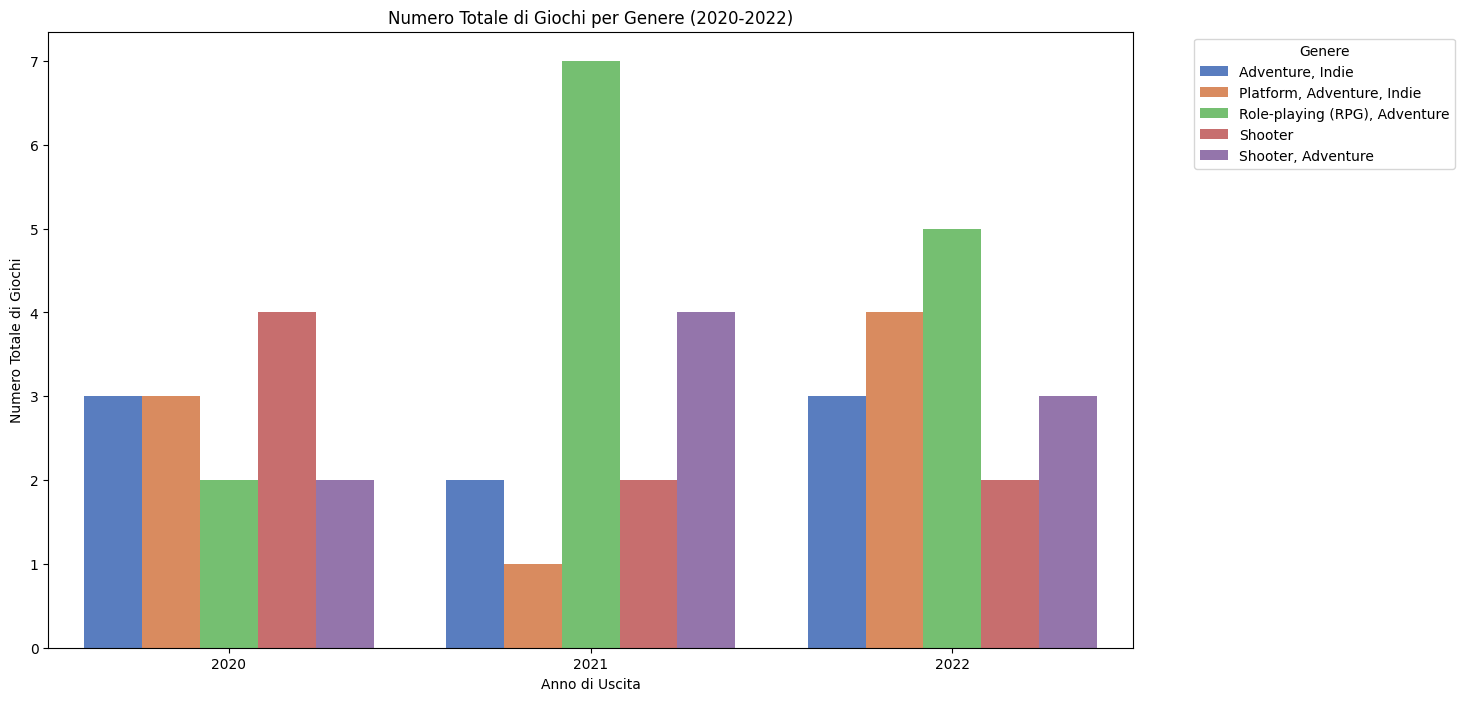

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


df = df[df['ReleaseDate'] != 'N/A']


df.loc[:, 'ReleaseYear'] = pd.to_datetime(df['ReleaseDate'], format='%d-%m-%Y', errors='coerce', dayfirst=True).dt.year

df = df.dropna(subset=['ReleaseYear'])

# Filtra il DataFrame per gli anni specifici
df_filtered = df[df['ReleaseYear'].isin([2020, 2021, 2022])]

# Crea un DataFrame aggregato per il numero totale di giochi per genere ogni anno
df_genre_count = df_filtered.groupby(['ReleaseYear', 'Genres']).size().reset_index(name='GameCount')

# Seleziona solo i generi più frequenti (ad esempio, i primi 5)
top_genres = df_genre_count.groupby('Genres')['GameCount'].sum().sort_values(ascending=False).head(5).index
df_top_genres = df_genre_count[df_genre_count['Genres'].isin(top_genres)]

# Crea un grafico a barre
plt.figure(figsize=(14, 8))
sns.barplot(x='ReleaseYear', y='GameCount', hue='Genres', data=df_top_genres, palette='muted')
plt.title('Numero Totale di Giochi per Genere (2020-2022)')
plt.xlabel('Anno di Uscita')
plt.ylabel('Numero Totale di Giochi')
plt.legend(title='Genere', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


questo grafico invece ci consente di capire quali sono le tendenze per genere di gioco negli anni 2020,2021,2022